# Keras-Regression 
<!-- # On how to install a package in jupyter notebook

# import sys
# !{sys.executable} -m pip install seaborn==0.9.0 -->

In [206]:
# imports 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [207]:
# import data 
df = pd.read_csv('../DATA/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [209]:
df.isnull().sum()   # 0 indicates false for isnull and 1 indicates True for isnull 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [210]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


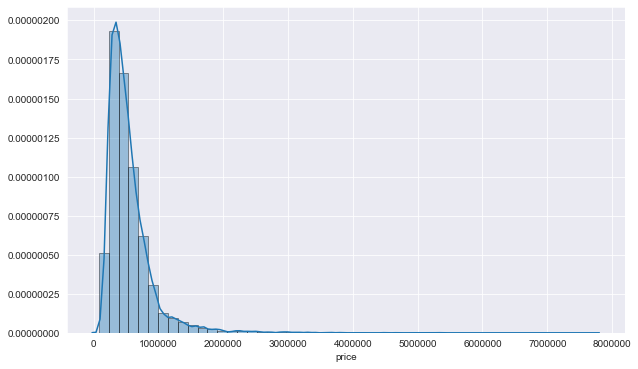

In [211]:
# Visualise 
plt.figure(figsize=(10,6))
sns.distplot(df['price'],kde=True, hist_kws=dict(edgecolor='k', lw=1))
# prices between 1mi to 2mi 

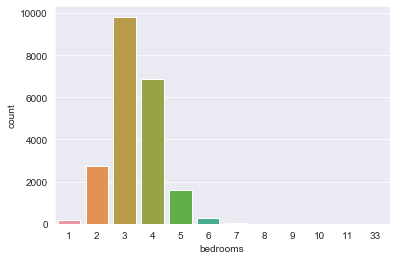

In [212]:
sns.countplot(x=df['bedrooms'])
# plt.grid(True)
# majority has 2 -5 bedrooms 

In [213]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

Text(51.25, 0.5, 'sqft')

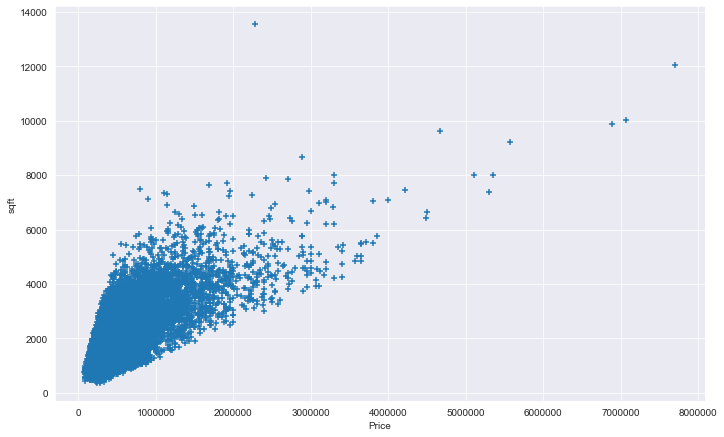

In [214]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['price'],y=df['sqft_living'],marker='+',linewidths=0.01)  # since its closely correlated
plt.tight_layout()
plt.grid(True)
plt.xlabel('Price')
plt.ylabel('sqft')

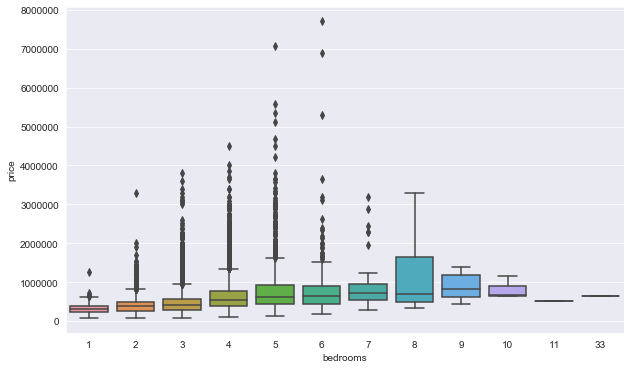

In [215]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms',y='price', data=df)

In [216]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Text(0, 0.5, 'longitude')

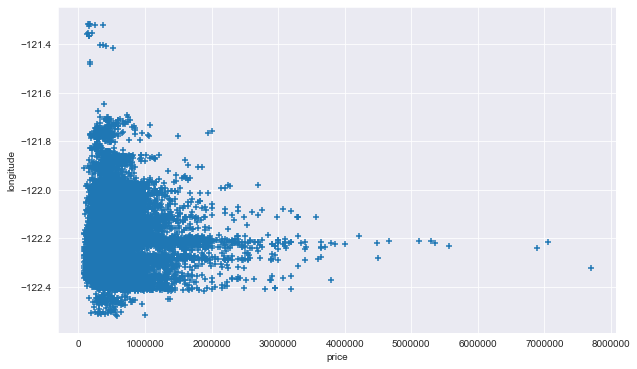

In [217]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['price'],y=df['long'],marker='+', linewidths=0.001)
plt.xlabel('price')
plt.ylabel('longitude')

Text(0, 0.5, 'latitude')

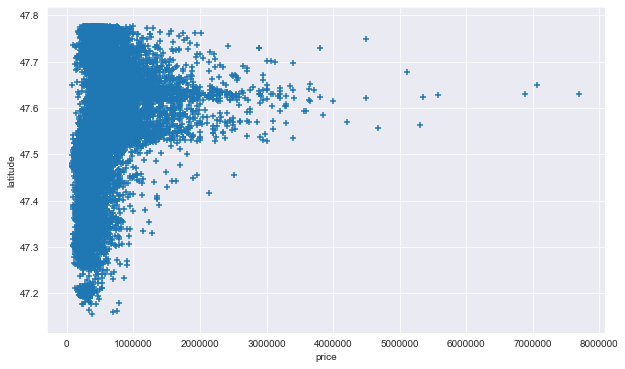

In [218]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['price'],y=df['lat'],marker='+', linewidths=0.001)
plt.xlabel('price')
plt.ylabel('latitude')

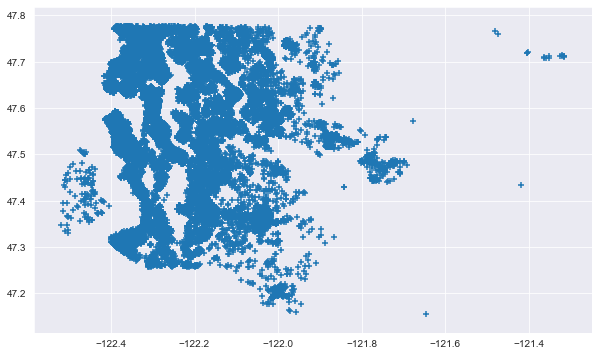

In [219]:
# replica of seattle map 
plt.figure(figsize=(10,6))
plt.scatter(x=df['long'],y=df['lat'],marker='+')  # replica of the seattle map 

In [220]:
# analyse the costliest area in seattle 
print(sns.__version__)

0.9.0


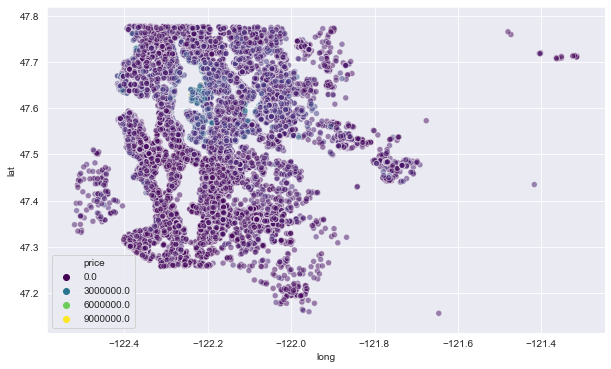

In [221]:
# identifying the priced lat and long locations
plt.figure(figsize=(10,6))
sns.scatterplot(x='long',y='lat',data=df, hue='price',palette='viridis',marker='o',alpha=0.5)

In [222]:
df.sort_values(by='price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [223]:
# Idea is to drop the top 1 % price distribution records and retain the remaining 99%
len(df) * 0.01

# => drop the 1% which is 216 records in the sorted dataframe in descending order and focus on the 
# remaining 99% majority 

215.97

In [224]:
non_top_1_percent = df.sort_values(by='price',ascending=False).iloc[216:]

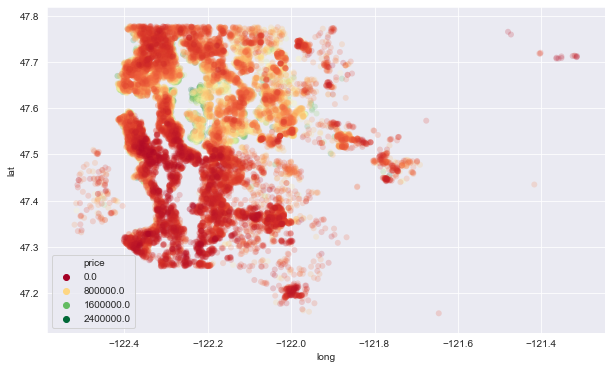

In [225]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long',y='lat',data=non_top_1_percent, hue='price',palette='RdYlGn',
                marker='o',edgecolor='None',alpha=0.2)

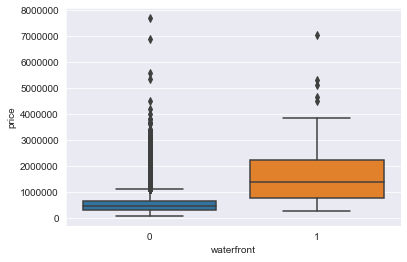

In [226]:
# Check and analyse the prices based on the waterfront 
sns.set_style(style='darkgrid')
sns.boxplot(x='waterfront',y='price',data=df)

# => the houses with waterfront are found to have higher prices 


# Part2 

In [227]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [228]:
# Feature engineering - eliminating useless data , segregating generating useful data from exisiting data 
df.drop(labels='id',axis=1,inplace=True) #id is of no use for analysis so drop it 

In [229]:
df['date'].head()

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object

In [230]:
# convert the date column with object type date type 
df['date'] = pd.to_datetime(arg=df['date'])

In [231]:
df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [232]:
# extract date year and month from the date column 
df['year'] = df['date'].apply(lambda date: date.year)

In [233]:
df['month'] = df['date'].apply(lambda date: date.month)

In [234]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


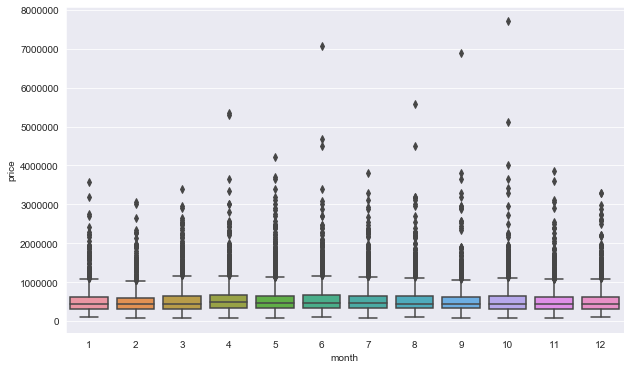

In [235]:
# Explore the data 
# Analysing the price based on the month
plt.figure(figsize=(10,6))
sns.boxplot(x='month',y='price',data=df)

Text(0, 0.5, 'price')

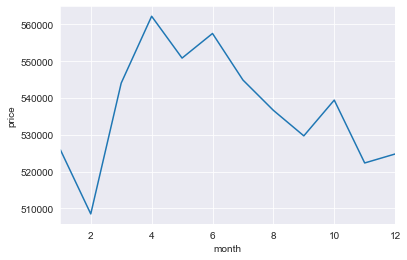

In [236]:
# Lets a try a different approach 
df.groupby(by='month',axis=0).mean()['price'].plot()
plt.ylabel('price')

Text(0, 0.5, 'price')

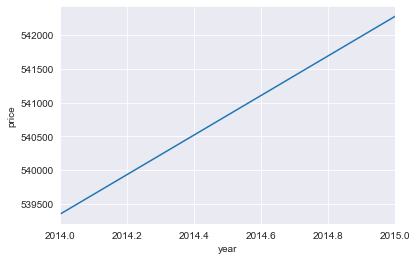

In [237]:
# Explore it based on the year 
df.groupby(by='year').mean()['price'].plot()
plt.ylabel('price')

In [238]:
# Dropping date column as we have split it to our convenience 
df.drop(labels='date',axis=1,inplace=True)

In [239]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [240]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [241]:
# couldnt make the zipcodes into dummy variables 
df['zipcode'].value_counts()   # 70 unique zip codes making into dummy variables of 70 cols is not ideal 
# Lets drop zipcode 

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    409
98056    406
98053    403
98001    361
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98199    317
98004    317
        ... 
98112    269
98168    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    233
98105    229
98045    220
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    117
98109    109
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [242]:
df.drop(labels='zipcode',axis=1, inplace=True)

In [243]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [244]:
df['yr_renovated'].value_counts()  
# => most homes are not renovated so catgorise into renovated or not 
# => if renovated then the price would be high , if not then price will be low , so lets have it as a 
# continuous feature 


0       20683
2014       91
2013       37
2003       36
2000       35
2007       35
2005       35
2004       26
1990       25
2006       24
2009       22
1989       22
2002       22
1991       20
2001       19
1998       19
1994       19
1993       19
1987       18
1983       18
1984       18
2010       18
2008       18
1986       17
1985       17
1999       17
1992       17
2015       16
1995       16
1996       15
        ...  
1975        6
1978        6
1981        5
1964        5
1965        5
1958        5
1973        5
1969        4
1972        4
1960        4
1963        4
1956        3
1945        3
1974        3
1953        3
1955        3
1976        3
1957        3
1962        2
1950        2
1967        2
1946        2
1971        2
1940        2
1954        1
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [245]:
df['sqft_basement'].value_counts()
# 0 - no basement sqft => prices will be low else otherwise => lets have it continous 


0       13110
600       221
700       218
500       214
800       206
400       184
1000      149
900       144
300       142
200       108
530       107
480       106
750       105
450       103
720       102
620        91
580        85
840        85
420        81
860        80
1100       80
670        79
780        77
380        76
850        76
550        76
650        76
680        75
240        74
360        73
        ...  
1525        1
2580        1
2500        1
2180        1
1990        1
1284        1
516         1
276         1
20          1
915         1
2850        1
1798        1
2310        1
266         1
2120        1
1913        1
1481        1
3480        1
3000        1
2600        1
2360        1
1960        1
295         1
1880        1
1816        1
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [246]:
# Lets train our model in the form of numpy types for the sake of tensorflow neural networks
X = df.drop(labels='price',axis=1).values
y = df['price'].values
type(X)

numpy.ndarray

In [247]:
X.shape

(21597, 19)

In [248]:
X

array([[3.000e+00, 1.000e+00, 1.180e+03, ..., 5.650e+03, 2.014e+03,
        1.000e+01],
       [3.000e+00, 2.250e+00, 2.570e+03, ..., 7.639e+03, 2.014e+03,
        1.200e+01],
       [2.000e+00, 1.000e+00, 7.700e+02, ..., 8.062e+03, 2.015e+03,
        2.000e+00],
       ...,
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 2.007e+03, 2.014e+03,
        6.000e+00],
       [3.000e+00, 2.500e+00, 1.600e+03, ..., 1.287e+03, 2.015e+03,
        1.000e+00],
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 1.357e+03, 2.014e+03,
        1.000e+01]])

In [249]:
# train and test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [250]:
# Scaling post split 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [251]:
# scale on the train data and then transform it and assign it as the new training data  
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [252]:
# only transform the test set - we dont fit the test data
X_test = scaler.transform(X_test)

In [253]:
# import models and layers for the neural network 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

In [254]:
X_train.shape    # 15117 x 19 

(15117, 19)

In [255]:
# create the neural network and layer 
model = Sequential()
model.add(Dense(19, activation='relu'))    # 1st layer 
model.add(Dense(19, activation='relu'))    # 2nd layer 
model.add(Dense(19, activation='relu'))    # 3rd layer
model.add(Dense(19, activation='relu'))    # 4th layer 

model.add(Dense(1))                        # output layer

# compile the model 
model.compile(optimizer='adam',loss='mse')

In [256]:
# fit the model - validation data is the target data which will be used to evaluate the loss @ end of epoch
# model wont be trained on the validation data 
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 1s 41us/sample - loss: 430235217821.6440 - val_loss: 418885435877.4518
Epoch 2/400
15117/15117 [==============================] - 0s 18us/sample - loss: 428544411101.0809 - val_loss: 412708904211.5950
Epoch 3/400
15117/15117 [==============================] - 0s 16us/sample - loss: 402379926702.5616 - val_loss: 352413067056.6716
Epoch 4/400
15117/15117 [==============================] - 0s 15us/sample - loss: 283011111622.0330 - val_loss: 179964228686.3802
Epoch 5/400
15117/15117 [==============================] - 0s 14us/sample - loss: 126890897019.5885 - val_loss: 95714361991.2691
Epoch 6/400
15117/15117 [==============================] - 0s 16us/sample - loss: 97499440805.0444 - val_loss: 93333428674.0543
Epoch 7/400
15117/15117 [==============================] - 0s 16us/sample - loss: 95369543158.6860 - val_loss: 91365139665.8568
Epoch 8/400
15117/15117 [=====================

15117/15117 [==============================] - 0s 17us/sample - loss: 36527236387.3425 - val_loss: 35119251986.9630
Epoch 64/400
15117/15117 [==============================] - 0s 16us/sample - loss: 36349489083.0424 - val_loss: 35037181977.2840
Epoch 65/400
15117/15117 [==============================] - 0s 15us/sample - loss: 36182876096.9695 - val_loss: 34852099079.5852
Epoch 66/400
15117/15117 [==============================] - 0s 13us/sample - loss: 36052105457.6903 - val_loss: 34726548831.4469
Epoch 67/400
15117/15117 [==============================] - 0s 14us/sample - loss: 35903295752.3826 - val_loss: 34601346096.0395
Epoch 68/400
15117/15117 [==============================] - 0s 16us/sample - loss: 35807262839.8629 - val_loss: 34566249889.1852
Epoch 69/400
15117/15117 [==============================] - 0s 16us/sample - loss: 35698684775.1146 - val_loss: 34388296104.7704
Epoch 70/400
15117/15117 [==============================] - 0s 16us/sample - loss: 35582321078.9442 - val_loss

15117/15117 [==============================] - 0s 18us/sample - loss: 32570299465.6315 - val_loss: 31101617776.5136
Epoch 127/400
15117/15117 [==============================] - 0s 17us/sample - loss: 32531195319.9603 - val_loss: 31164369588.7802
Epoch 128/400
15117/15117 [==============================] - 0s 17us/sample - loss: 32498026485.0264 - val_loss: 30993323824.6716
Epoch 129/400
15117/15117 [==============================] - 0s 17us/sample - loss: 32453962155.8352 - val_loss: 30951663570.4889
Epoch 130/400
15117/15117 [==============================] - 0s 18us/sample - loss: 32426412439.2427 - val_loss: 30911954761.9556
Epoch 131/400
15117/15117 [==============================] - 0s 16us/sample - loss: 32387925809.9401 - val_loss: 30965516475.1012
Epoch 132/400
15117/15117 [==============================] - 0s 16us/sample - loss: 32359252434.1750 - val_loss: 30857069964.9580
Epoch 133/400
15117/15117 [==============================] - 0s 16us/sample - loss: 32349689841.5040 - v

Epoch 189/400
15117/15117 [==============================] - 0s 18us/sample - loss: 31087457290.7704 - val_loss: 29304563165.8667
Epoch 190/400
15117/15117 [==============================] - 0s 16us/sample - loss: 31043821783.6788 - val_loss: 29242538087.6642
Epoch 191/400
15117/15117 [==============================] - 0s 19us/sample - loss: 31033090696.2556 - val_loss: 29226670762.6667
Epoch 192/400
15117/15117 [==============================] - 0s 17us/sample - loss: 31007297272.3625 - val_loss: 29276652516.1876
Epoch 193/400
15117/15117 [==============================] - 0s 16us/sample - loss: 31042385472.7917 - val_loss: 29188023763.7531
Epoch 194/400
15117/15117 [==============================] - 0s 15us/sample - loss: 31003409475.9415 - val_loss: 29181568088.4938
Epoch 195/400
15117/15117 [==============================] - 0s 15us/sample - loss: 30983928147.6399 - val_loss: 29155438592.0000
Epoch 196/400
15117/15117 [==============================] - 0s 15us/sample - loss: 309553

Epoch 252/400
15117/15117 [==============================] - 0s 17us/sample - loss: 30291319068.3654 - val_loss: 28274684025.3630
Epoch 253/400
15117/15117 [==============================] - 0s 15us/sample - loss: 30305271980.8682 - val_loss: 28322971192.8889
Epoch 254/400
15117/15117 [==============================] - 0s 17us/sample - loss: 30256292510.3383 - val_loss: 28448376255.5259
Epoch 255/400
15117/15117 [==============================] - 0s 17us/sample - loss: 30307248437.2931 - val_loss: 28242737268.3062
Epoch 256/400
15117/15117 [==============================] - 0s 17us/sample - loss: 30253792103.5211 - val_loss: 28240433900.4049
Epoch 257/400
15117/15117 [==============================] - 0s 19us/sample - loss: 30246002030.1256 - val_loss: 28218125284.1876
Epoch 258/400
15117/15117 [==============================] - 0s 16us/sample - loss: 30234086034.1454 - val_loss: 28181730422.8346
Epoch 259/400
15117/15117 [==============================] - 0s 16us/sample - loss: 302875

15117/15117 [==============================] - 0s 15us/sample - loss: 29699006523.0678 - val_loss: 27478014897.6198
Epoch 316/400
15117/15117 [==============================] - 0s 16us/sample - loss: 29643232008.6874 - val_loss: 27490211491.0815
Epoch 317/400
15117/15117 [==============================] - 0s 15us/sample - loss: 29632798549.2995 - val_loss: 27514690228.7802
Epoch 318/400
15117/15117 [==============================] - 0s 20us/sample - loss: 29631801452.5168 - val_loss: 27628901960.0593
Epoch 319/400
15117/15117 [==============================] - 0s 16us/sample - loss: 29624992117.5090 - val_loss: 27450180565.0173
Epoch 320/400
15117/15117 [==============================] - 0s 19us/sample - loss: 29598513954.1570 - val_loss: 27475973420.8790
Epoch 321/400
15117/15117 [==============================] - 0s 17us/sample - loss: 29628445412.7861 - val_loss: 27429772169.1654
Epoch 322/400
15117/15117 [==============================] - 0s 16us/sample - loss: 29626022574.3245 - v

15117/15117 [==============================] - 0s 15us/sample - loss: 29063609612.3114 - val_loss: 26764850749.9457
Epoch 379/400
15117/15117 [==============================] - 0s 15us/sample - loss: 29124648172.1357 - val_loss: 26738923332.8988
Epoch 380/400
15117/15117 [==============================] - 0s 15us/sample - loss: 29003361222.6257 - val_loss: 26752951940.7407
Epoch 381/400
15117/15117 [==============================] - 0s 15us/sample - loss: 29067310584.1762 - val_loss: 26727961698.6074
Epoch 382/400
15117/15117 [==============================] - 0s 16us/sample - loss: 29021291758.2356 - val_loss: 26725626412.2469
Epoch 383/400
15117/15117 [==============================] - 0s 14us/sample - loss: 28988168942.1340 - val_loss: 26716541964.6420
Epoch 384/400
15117/15117 [==============================] - 0s 12us/sample - loss: 28973989670.8310 - val_loss: 26714052304.5926
Epoch 385/400
15117/15117 [==============================] - 0s 15us/sample - loss: 28951137702.5516 - v

# Part 3 

In [257]:
#Evaluate the loss using history feature 
loss_valloss_df = pd.DataFrame(model.history.history)

Text(0, 0.5, 'Loss')

<Figure size 720x432 with 0 Axes>

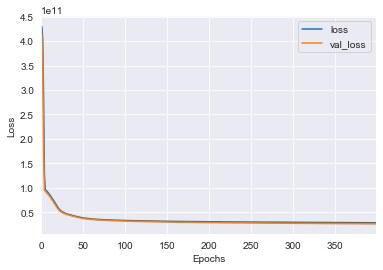

In [258]:
plt.figure(figsize=(10,6))
loss_valloss_df.plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [259]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
predictions = model.predict(X_test)

In [260]:
# Evaluate 
mean_squared_error(y_test,predictions)

26548103642.38588

In [261]:
# root mean square 
np.sqrt(mean_squared_error(y_test,predictions))

162935.888135137

In [262]:
mean_absolute_error(y_test, predictions)

101066.44919463735

In [263]:
# how to check if the model did good 
df['price'].describe()


count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [264]:
# mean of the original data - 5.402966e+05
print('Avg price in the data ',540296.6,'$')
print('Model predicted price ', mean_absolute_error(y_test, predictions),'$')
print('Deviation from the true value', (100384.90*100)/540296.6,'%')

Avg price in the data  540296.6 $
Model predicted price  101066.44919463735 $
Deviation from the true value 18.579591283750446 %


In [265]:
# Explained variance score 
explained_variance_score(y_test,predictions)   # 1.0 represents best score 

0.8002419549872561

Text(0, 0.5, 'Predicted price')

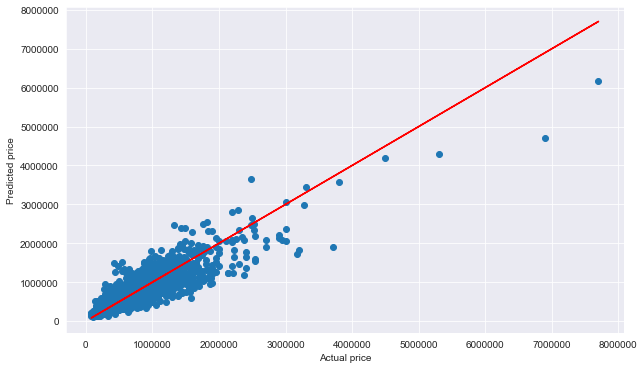

In [266]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predictions)
plt.plot(y_test,y_test,'r')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')

In [267]:
# will evaluate for a single home 
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [268]:
single_house = df.drop('price',axis=1).iloc[0]

In [269]:
single_house.shape    # tuple (19,)

(19,)

In [270]:
single_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [271]:
single_house.values   # to have it in the numpy data type 

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

In [272]:
single_house.values.shape

(19,)

> Need the array to be in this format 
array([[3.000e+00, 1.000e+00, 1.180e+03, ..., 5.650e+03, 2.014e+03, -->
        1.000e+01],
       [3.000e+00, 2.250e+00, 2.570e+03, ..., 7.639e+03, 2.014e+03,
        1.200e+01],
       [2.000e+00, 1.000e+00, 7.700e+02, ..., 8.062e+03, 2.015e+03,
        2.000e+00],
       ...,
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 2.007e+03, 2.014e+03,
        6.000e+00],
       [3.000e+00, 2.500e+00, 1.600e+03, ..., 1.287e+03, 2.015e+03,
        1.000e+00],
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 1.357e+03, 2.014e+03,
        1.000e+01]])

In [273]:
single_house.values.reshape(-1,19)   # -1 implies keep the old dims along the axis 

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [274]:
# scale 
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [275]:
model.predict(single_house)  # overshooting the actual value 221900.0

array([[287612.94]], dtype=float32)

In [276]:
df['price'].iloc[0]

221900.0

# Classification problem
> Dealing with overfitting through Early stopping callbacks 
> Dropout layers 
  - turnoff neurons during training to prevent overfitting 
  - drop certain user defined % of neurons in previous layer every batch  
> Early stopping 
  - keras stops training data automatically based on the loss condition on validation data passed during 
  - model.fit() call



In [277]:
df_cancer = pd.read_csv("../DATA/cancer_classification.csv")

In [278]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [279]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [280]:
df_cancer.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


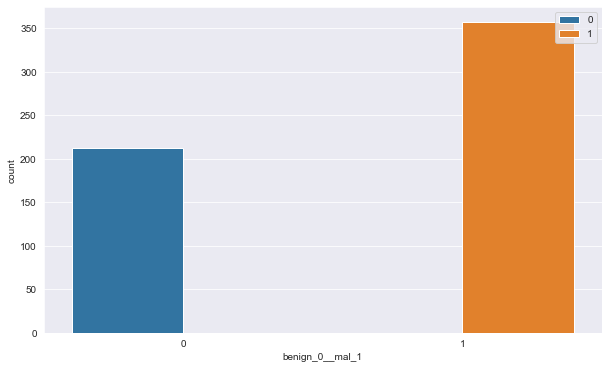

In [281]:
# classify if the tumor is benign or malignant 
plt.figure(figsize=(10,6))
sns.countplot(data=df_cancer, x='benign_0__mal_1',hue='benign_0__mal_1')
plt.legend(loc='upper right')


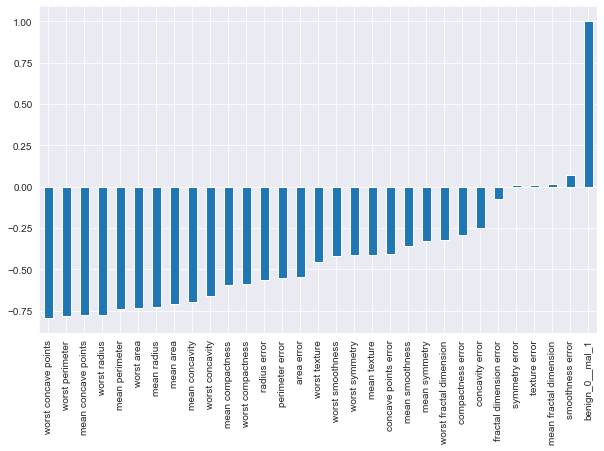

In [282]:
# check the correlation of benign mal column with other columns 
plt.figure(figsize=(10,6))
df_cancer.corr()['benign_0__mal_1'].sort_values().plot.bar()
# plt.tight_layout()

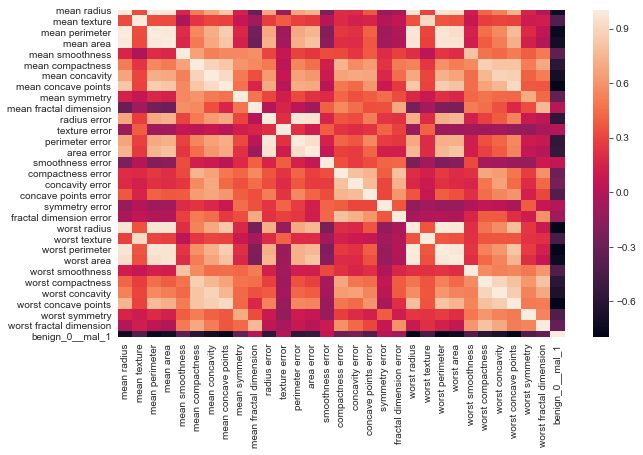

In [283]:
# heatplot 
plt.figure(figsize=(10,6))
sns.heatmap(data=df_cancer.corr())

In [284]:
# Labelling for neural networks should always be converted to numpy format for tensorflow sake
X = df_cancer.drop(labels='benign_0__mal_1',axis=1).values
y = df_cancer['benign_0__mal_1'].values

In [285]:
from sklearn.model_selection import train_test_split # to train test data split 
from sklearn.preprocessing import MinMaxScaler     # To scale 

In [286]:
# split train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [287]:
# scale and transform 
scaler = MinMaxScaler()

In [288]:
# fit the training data 
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [289]:
# transform the training data and assign it as transformed training data 
X_train = scaler.transform(X_train)

In [290]:
# transform the test data as well # donot fit the test data and leak it to the model 
X_test = scaler.transform(X_test)

# Solving overfitting and Evaluation 

In [291]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [292]:
# Design the neural network 
X_train.shape

(426, 30)

In [293]:
# 30 neurons ?
model_cancer = Sequential()
model_cancer.add(Dense(units=30,activation='relu'))
model_cancer.add(Dense(units=15,activation='relu'))

# Since its a binary classification - we use sigmoid as its activation function
model_cancer.add(Dense(units=1,activation='sigmoid'))
model_cancer.compile(optimizer='adam', loss='binary_crossentropy')


In [294]:
# fit the model on training data 
model_cancer.fit(x=X_train, y=y_train,epochs=600,validation_data=(X_test,y_test))
# 600 epochs just to visualise the overfitting problem 

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 723us/sample - loss: 0.6623 - val_loss: 0.6331
Epoch 2/600
426/426 [==============================] - 0s 80us/sample - loss: 0.6131 - val_loss: 0.5867
Epoch 3/600
426/426 [==============================] - 0s 66us/sample - loss: 0.5675 - val_loss: 0.5430
Epoch 4/600
426/426 [==============================] - 0s 75us/sample - loss: 0.5233 - val_loss: 0.4970
Epoch 5/600
426/426 [==============================] - 0s 91us/sample - loss: 0.4790 - val_loss: 0.4514
Epoch 6/600
426/426 [==============================] - 0s 59us/sample - loss: 0.4358 - val_loss: 0.4078
Epoch 7/600
426/426 [==============================] - 0s 77us/sample - loss: 0.3949 - val_loss: 0.3679
Epoch 8/600
426/426 [==============================] - 0s 80us/sample - loss: 0.3572 - val_loss: 0.3327
Epoch 9/600
426/426 [==============================] - 0s 68us/sample - loss: 0.3240 - val_loss: 0.2979
Epoch 10/600
426/

426/426 [==============================] - 0s 68us/sample - loss: 0.0535 - val_loss: 0.1100
Epoch 79/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0543 - val_loss: 0.1056
Epoch 80/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0554 - val_loss: 0.1131
Epoch 81/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0547 - val_loss: 0.1079
Epoch 82/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0554 - val_loss: 0.1093
Epoch 83/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0527 - val_loss: 0.1059
Epoch 84/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0522 - val_loss: 0.1082
Epoch 85/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0531 - val_loss: 0.1093
Epoch 86/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0534 - val_loss: 0.1054
Epoch 87/600
426/426 [==============================] - 0s 68us/samp

426/426 [==============================] - 0s 94us/sample - loss: 0.0413 - val_loss: 0.1200
Epoch 156/600
426/426 [==============================] - 0s 87us/sample - loss: 0.0413 - val_loss: 0.1277
Epoch 157/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0410 - val_loss: 0.1329
Epoch 158/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0411 - val_loss: 0.1275
Epoch 159/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0393 - val_loss: 0.1353
Epoch 160/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0418 - val_loss: 0.1326
Epoch 161/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0418 - val_loss: 0.1400
Epoch 162/600
426/426 [==============================] - 0s 85us/sample - loss: 0.0490 - val_loss: 0.1191
Epoch 163/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0421 - val_loss: 0.1269
Epoch 164/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 61us/sample - loss: 0.0324 - val_loss: 0.1581
Epoch 233/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0330 - val_loss: 0.1547
Epoch 234/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0320 - val_loss: 0.1417
Epoch 235/600
426/426 [==============================] - 0s 64us/sample - loss: 0.0325 - val_loss: 0.1592
Epoch 236/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0325 - val_loss: 0.1435
Epoch 237/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0325 - val_loss: 0.1440
Epoch 238/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0319 - val_loss: 0.1594
Epoch 239/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0385 - val_loss: 0.1306
Epoch 240/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0401 - val_loss: 0.1618
Epoch 241/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 73us/sample - loss: 0.0277 - val_loss: 0.1475
Epoch 310/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0297 - val_loss: 0.1899
Epoch 311/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0297 - val_loss: 0.1501
Epoch 312/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0278 - val_loss: 0.1902
Epoch 313/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0254 - val_loss: 0.1741
Epoch 314/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0262 - val_loss: 0.1679
Epoch 315/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0244 - val_loss: 0.1916
Epoch 316/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0255 - val_loss: 0.1721
Epoch 317/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0229 - val_loss: 0.1595
Epoch 318/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 61us/sample - loss: 0.0196 - val_loss: 0.1976
Epoch 387/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0199 - val_loss: 0.1654
Epoch 388/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0211 - val_loss: 0.2236
Epoch 389/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0170 - val_loss: 0.1860
Epoch 390/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0241 - val_loss: 0.2046
Epoch 391/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0181 - val_loss: 0.1813
Epoch 392/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0164 - val_loss: 0.1960
Epoch 393/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0155 - val_loss: 0.2146
Epoch 394/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0162 - val_loss: 0.1910
Epoch 395/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 63us/sample - loss: 0.0123 - val_loss: 0.2140
Epoch 464/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0123 - val_loss: 0.2058
Epoch 465/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0117 - val_loss: 0.2285
Epoch 466/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0118 - val_loss: 0.2102
Epoch 467/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0119 - val_loss: 0.2405
Epoch 468/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0109 - val_loss: 0.1955
Epoch 469/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0104 - val_loss: 0.2503
Epoch 470/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0146 - val_loss: 0.1650
Epoch 471/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0223 - val_loss: 0.3512
Epoch 472/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 73us/sample - loss: 0.0072 - val_loss: 0.2193
Epoch 541/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0090 - val_loss: 0.2262
Epoch 542/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0077 - val_loss: 0.2478
Epoch 543/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0079 - val_loss: 0.2234
Epoch 544/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0073 - val_loss: 0.2504
Epoch 545/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0075 - val_loss: 0.2415
Epoch 546/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0103 - val_loss: 0.1873
Epoch 547/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0124 - val_loss: 0.3730
Epoch 548/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0128 - val_loss: 0.1857
Epoch 549/600
426/426 [==============================] - 0s 

In [295]:
loss_cancer_df = pd.DataFrame(data=model_cancer.history.history)

In [296]:
loss_cancer_df.head()

,loss,val_loss
0,0.662305,0.633142
1,0.613109,0.586744
2,0.567507,0.543019
3,0.523325,0.497018
4,0.478976,0.451401


Text(0, 0.5, 'Loss')

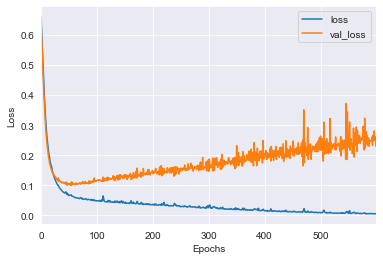

In [297]:
loss_cancer_df.plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')

#  The deviation of val_loss indicates that we are overfitting the model by using higher epochs 


# Earlystopping 

In [298]:
# How to avoid this overfitting issue ? - callbacks / Earlystopping 
from tensorflow.keras.callbacks import EarlyStopping

In [205]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

In [302]:
model_cancer = Sequential()
model_cancer.add(Dense(units=30,activation='relu'))
model_cancer.add(Dense(units=15,activation='relu'))

# Since its a binary classification - we use sigmoid as its activation function
model_cancer.add(Dense(units=1,activation='sigmoid'))
model_cancer.compile(optimizer='adam', loss='binary_crossentropy')

In [303]:
earlystopping = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [304]:
model_cancer.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
                 callbacks=[earlystopping])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 669us/sample - loss: 0.6887 - val_loss: 0.6677
Epoch 2/600
426/426 [==============================] - 0s 73us/sample - loss: 0.6518 - val_loss: 0.6421
Epoch 3/600
426/426 [==============================] - 0s 73us/sample - loss: 0.6274 - val_loss: 0.6155
Epoch 4/600
426/426 [==============================] - 0s 73us/sample - loss: 0.5998 - val_loss: 0.5874
Epoch 5/600
426/426 [==============================] - 0s 61us/sample - loss: 0.5686 - val_loss: 0.5521
Epoch 6/600
426/426 [==============================] - 0s 87us/sample - loss: 0.5303 - val_loss: 0.5126
Epoch 7/600
426/426 [==============================] - 0s 75us/sample - loss: 0.4896 - val_loss: 0.4703
Epoch 8/600
426/426 [==============================] - 0s 66us/sample - loss: 0.4483 - val_loss: 0.4283
Epoch 9/600
426/426 [==============================] - 0s 82us/sample - loss: 0.4090 - val_loss: 0.3891
Epoch 10/600
426/

426/426 [==============================] - 0s 73us/sample - loss: 0.0641 - val_loss: 0.1142
Epoch 79/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0580 - val_loss: 0.1108
Epoch 80/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0635 - val_loss: 0.1122
Epoch 81/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0575 - val_loss: 0.1097
Epoch 82/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0536 - val_loss: 0.1150
Epoch 83/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0573 - val_loss: 0.1103
Epoch 84/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0551 - val_loss: 0.1124
Epoch 85/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0547 - val_loss: 0.1190
Epoch 86/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0538 - val_loss: 0.1115
Epoch 87/600
426/426 [==============================] - 0s 73us/samp

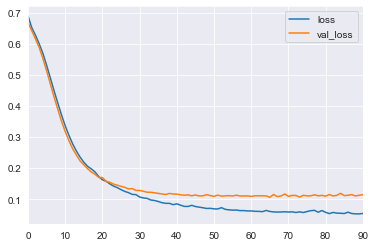

In [305]:
loss_earlystop = pd.DataFrame(data=model_cancer.history.history)
loss_earlystop.plot()

# Dropout layers 

In [306]:
from tensorflow.keras.layers import Dropout

In [307]:
model_cancer = Sequential()
model_cancer.add(Dense(units=30,activation='relu'))
model_cancer.add(Dropout(0.5))

model_cancer.add(Dense(units=15,activation='relu'))
model_cancer.add(Dropout(0.5))

# Since its a binary classification - we use sigmoid as its activation function
model_cancer.add(Dense(units=1,activation='sigmoid'))
model_cancer.compile(optimizer='adam', loss='binary_crossentropy')

In [308]:
model_cancer.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
                 callbacks=[earlystopping])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.7018 - val_loss: 0.6555
Epoch 2/600
426/426 [==============================] - 0s 99us/sample - loss: 0.6517 - val_loss: 0.6311
Epoch 3/600
426/426 [==============================] - 0s 85us/sample - loss: 0.6430 - val_loss: 0.5988
Epoch 4/600
426/426 [==============================] - 0s 106us/sample - loss: 0.6270 - val_loss: 0.5734
Epoch 5/600
426/426 [==============================] - 0s 94us/sample - loss: 0.6002 - val_loss: 0.5480
Epoch 6/600
426/426 [==============================] - 0s 96us/sample - loss: 0.5686 - val_loss: 0.5209
Epoch 7/600
426/426 [==============================] - 0s 89us/sample - loss: 0.5654 - val_loss: 0.4940
Epoch 8/600
426/426 [==============================] - 0s 73us/sample - loss: 0.5312 - val_loss: 0.4638
Epoch 9/600
426/426 [==============================] - 0s 101us/sample - loss: 0.5062 - val_loss: 0.4353
Epoch 10/600
426/

426/426 [==============================] - 0s 96us/sample - loss: 0.1313 - val_loss: 0.1119
Epoch 79/600
426/426 [==============================] - 0s 87us/sample - loss: 0.1552 - val_loss: 0.1140
Epoch 80/600
426/426 [==============================] - 0s 96us/sample - loss: 0.1416 - val_loss: 0.1070
Epoch 81/600
426/426 [==============================] - 0s 80us/sample - loss: 0.1379 - val_loss: 0.1075
Epoch 82/600
426/426 [==============================] - 0s 94us/sample - loss: 0.1142 - val_loss: 0.1160
Epoch 83/600
426/426 [==============================] - 0s 80us/sample - loss: 0.1381 - val_loss: 0.1048
Epoch 84/600
426/426 [==============================] - 0s 70us/sample - loss: 0.1516 - val_loss: 0.1052
Epoch 85/600
426/426 [==============================] - 0s 101us/sample - loss: 0.1358 - val_loss: 0.1207
Epoch 86/600
426/426 [==============================] - 0s 73us/sample - loss: 0.1148 - val_loss: 0.1062
Epoch 87/600
426/426 [==============================] - 0s 92us/sam

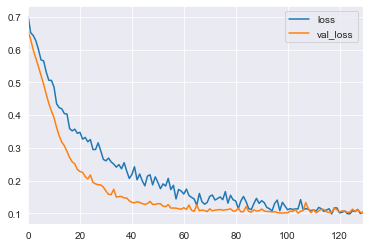

In [309]:
loss_dropout = pd.DataFrame(data=model_cancer.history.history)
loss_dropout.plot()

In [312]:
# classify and predict 
predict_cancer = model_cancer.predict_classes(X_test)

In [313]:
# Evaluate 
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predict_cancer))
print(confusion_matrix(y_test,predict_cancer))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        55
           1       0.97      0.99      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

[[52  3]
 [ 1 87]]
